# Определение перспективного тарифа

Нам предстоит определить какой из двух тарифов(смарт или ультра) выгоднее продвигать компании Мегалайн
Узнаем мы это исходя из данных о пользователях предоставленных Мегалайном. 


## Изучение данных

In [1]:
import pandas as pd
from IPython.display import HTML, display
import numpy as np
import matplotlib.pyplot as plt 
from scipy import stats as st

In [2]:
df = pd.read_csv('C:\\Users\\SpectNSK\\Desktop\\projects\\data set\\stat_analiz\\calls.csv')
df2 = pd.read_csv('C:\\Users\\SpectNSK\\Desktop\\projects\\data set\\stat_analiz\\internet.csv', index_col=0 )
df3 = pd.read_csv('C:\\Users\\SpectNSK\\Desktop\\projects\\data set\\stat_analiz\\messages.csv')
df4 = pd.read_csv('C:\\Users\\SpectNSK\\Desktop\\projects\\data set\\stat_analiz\\tariffs.csv')
df5 = pd.read_csv('C:\\Users\\SpectNSK\\Desktop\\projects\\data set\\stat_analiz\\users.csv')

In [3]:
df.info()
display(df.head())
print(df.isna().mean())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


id           0.0
call_date    0.0
duration     0.0
user_id      0.0
dtype: float64


In [4]:
df2.info()
display(df2.tail())
print(df2.isna().mean())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149396 entries, 0 to 149395
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            149396 non-null  object 
 1   mb_used       149396 non-null  float64
 2   session_date  149396 non-null  object 
 3   user_id       149396 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 5.7+ MB


,id,mb_used,session_date,user_id
149391,1499_152,318.90,2018-10-03,1499
149392,1499_153,490.13,2018-12-14,1499
149393,1499_154,0.00,2018-10-27,1499
149394,1499_155,1246.32,2018-11-26,1499
149395,1499_156,544.37,2018-10-26,1499


id              0.0
mb_used         0.0
session_date    0.0
user_id         0.0
dtype: float64


In [5]:
df3.info()
display(df3.head())
print(df3.isna().mean())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


id              0.0
message_date    0.0
user_id         0.0
dtype: float64


In [6]:
df4.info()
display(df4.head())
print(df4.isna().mean())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


messages_included        0.0
mb_per_month_included    0.0
minutes_included         0.0
rub_monthly_fee          0.0
rub_per_gb               0.0
rub_per_message          0.0
rub_per_minute           0.0
tariff_name              0.0
dtype: float64


In [7]:
df5.info()
display(df5.head())
print(df5.isna().mean())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


user_id       0.000
age           0.000
churn_date    0.924
city          0.000
first_name    0.000
last_name     0.000
reg_date      0.000
tariff        0.000
dtype: float64


### Вывод: У нас 5 маленьких таблиц, в которых отсутствуют пропуски.  Это отличная новость, ведь я в цейтноте. Плохая новость в том,что их 5

## Подготовка данных

Нулевые значения в звонках могут быть как недозвоны так и входящие звонки. С нулевыми значениями в данных транифика сложнее, кроме сбоев можно предположить какие-то минимальные значения, например получения уведомления. Из-за округления до мб,они могли просто отобразиться 0
    И те и другие данные,не сильно искажают общие показатели,не вижу смысла их удалять. Как обработать я придумать не смог



In [8]:
df['call_date'] = pd.to_datetime(df['call_date'], format='%Y-%m-%dT%H:%M:%S')
df['month'] = df['call_date'].dt.month
df['duration'] = np.ceil(df['duration'])
calls = df.groupby(['user_id','month']).agg({'duration':'sum'}).reset_index()
print(calls.head())

   user_id  month  duration
0     1000      5     159.0
1     1000      6     172.0
2     1000      7     340.0
3     1000      8     408.0
4     1000      9     466.0


In [9]:
df2['session_date'] = pd.to_datetime(df2['session_date'], format='%Y-%m-%dT%H:%M:%S')
df2['month'] = df2['session_date'].dt.month
internet = df2.groupby(['user_id','month']).agg({'mb_used':'sum'}).reset_index()
display(internet.head())

,user_id,month,mb_used
0,1000,5,2253.49
1,1000,6,23233.77
2,1000,7,14003.64
3,1000,8,14055.93
4,1000,9,14568.91


In [10]:
df3['message_date'] = pd.to_datetime(df3['message_date'], format='%Y-%m-%dT%H:%M:%S')
df3['month'] = df3['message_date'].dt.month
message = df3.groupby(['user_id','month']).agg({'message_date':'count'}).reset_index()
message.columns = ['user_id', 'month', 'message_count']
display(message.head())

,user_id,month,message_count
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57


Помесячные показатели рассчитаны. Данные подготовлены к дальнейшим расчетам.

In [11]:
df5['reg_date'] = pd.to_datetime(df5['reg_date'], format='%Y-%m-%dT%H:%M:%S')
df5['month'] = df5['reg_date'].dt.month
users = df5.groupby(['user_id','month']).agg({'tariff':'first','city':'first'}).reset_index()

display(users.head())

,user_id,month,tariff,city
0,1000,5,ultra,Краснодар
1,1001,11,smart,Москва
2,1002,6,smart,Стерлитамак
3,1003,8,ultra,Москва
4,1004,5,ultra,Новокузнецк


In [12]:
df4.columns = ['messages_included', 'mb_per_month_included', 'minutes_included' , 'rub_monthly_fee', 'rub_per_gb', 'rub_per_message', 'rub_per_minute', 'tariff' ]
df4.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff                 2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


In [13]:
data = calls.merge(message,  how = 'outer', on = ['user_id', 'month']).merge(internet,  how = 'outer', on =
['user_id', 'month']).merge(users[['user_id', 'tariff', 'city']], how = 'left', on = 'user_id')
display(data.head(10))

,user_id,month,duration,message_count,mb_used,tariff,city
0,1000,5,159.0,22.0,2253.49,ultra,Краснодар
1,1000,6,172.0,60.0,23233.77,ultra,Краснодар
2,1000,7,340.0,75.0,14003.64,ultra,Краснодар
3,1000,8,408.0,81.0,14055.93,ultra,Краснодар
4,1000,9,466.0,57.0,14568.91,ultra,Краснодар
5,1000,10,350.0,73.0,14702.49,ultra,Краснодар
6,1000,11,338.0,58.0,14756.47,ultra,Краснодар
7,1000,12,333.0,70.0,9817.61,ultra,Краснодар
8,1001,11,430.0,NaN,18429.34,smart,Москва
9,1001,12,414.0,NaN,14036.66,smart,Москва


In [14]:
data = data.fillna(value=0)
data2 = data.merge(df4.reset_index(), on='tariff', how = 'outer')
display(data2)

,user_id,month,duration,message_count,mb_used,tariff,city,index,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,5,159.0,22.0,2253.49,ultra,Краснодар,1,1000,30720,3000,1950,150,1,1
1,1000,6,172.0,60.0,23233.77,ultra,Краснодар,1,1000,30720,3000,1950,150,1,1
2,1000,7,340.0,75.0,14003.64,ultra,Краснодар,1,1000,30720,3000,1950,150,1,1
3,1000,8,408.0,81.0,14055.93,ultra,Краснодар,1,1000,30720,3000,1950,150,1,1
4,1000,9,466.0,57.0,14568.91,ultra,Краснодар,1,1000,30720,3000,1950,150,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1489,8,0.0,17.0,11050.56,smart,Санкт-Петербург,0,50,15360,500,550,200,3,3
3210,1489,9,0.0,32.0,17206.30,smart,Санкт-Петербург,0,50,15360,500,550,200,3,3
3211,1489,10,0.0,21.0,19559.44,smart,Санкт-Петербург,0,50,15360,500,550,200,3,3
3212,1489,11,0.0,20.0,17491.56,smart,Санкт-Петербург,0,50,15360,500,550,200,3,3


У нас слишком мало данных,чтобы легко избавляться от строк с пропусками.
Замена 0 кажется наиболее оптимальной так как скорее всего люди просто не пользовались данными услугами    


In [15]:
data2['perebor_minut'] = data2['duration'] - data2['minutes_included']
data2['perebor_message'] = data2['message_count'] - data2['messages_included']
data2['perebor_mb'] = data2['mb_used'] - data2['mb_per_month_included']
data2.loc[data2['perebor_minut'] < 0, 'perebor_minut'] = 0
data2.loc[data2['perebor_message'] < 0, 'perebor_message'] = 0
data2.loc[data2['perebor_mb'] < 0, 'perebor_mb'] = 0
data2['perebor_gb'] = data2['perebor_mb'] / 1024
data2['gb_used'] = data2['mb_used'] / 1024
data2['perebor_gb'] = np.ceil(data2['perebor_gb'])
data2['gb_used'] = np.ceil(data2['gb_used'])
data2['perebor_minut'] = data2['perebor_minut'].astype('int')
data2['perebor_message'] = data2['perebor_message'].astype('int')
data2['perebor_gb'] = data2['perebor_gb'].astype('int')

display(data2)
data2.info()

,user_id,month,duration,message_count,mb_used,tariff,city,index,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,perebor_minut,perebor_message,perebor_mb,perebor_gb,gb_used
0,1000,5,159.0,22.0,2253.49,ultra,Краснодар,1,1000,30720,3000,1950,150,1,1,0,0,0.00,0,3.0
1,1000,6,172.0,60.0,23233.77,ultra,Краснодар,1,1000,30720,3000,1950,150,1,1,0,0,0.00,0,23.0
2,1000,7,340.0,75.0,14003.64,ultra,Краснодар,1,1000,30720,3000,1950,150,1,1,0,0,0.00,0,14.0
3,1000,8,408.0,81.0,14055.93,ultra,Краснодар,1,1000,30720,3000,1950,150,1,1,0,0,0.00,0,14.0
4,1000,9,466.0,57.0,14568.91,ultra,Краснодар,1,1000,30720,3000,1950,150,1,1,0,0,0.00,0,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1489,8,0.0,17.0,11050.56,smart,Санкт-Петербург,0,50,15360,500,550,200,3,3,0,0,0.00,0,11.0
3210,1489,9,0.0,32.0,17206.30,smart,Санкт-Петербург,0,50,15360,500,550,200,3,3,0,0,1846.30,2,17.0
3211,1489,10,0.0,21.0,19559.44,smart,Санкт-Петербург,0,50,15360,500,550,200,3,3,0,0,4199.44,5,20.0
3212,1489,11,0.0,20.0,17491.56,smart,Санкт-Петербург,0,50,15360,500,550,200,3,3,0,0,2131.56,3,18.0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                3214 non-null   int64  
 1   month                  3214 non-null   int64  
 2   duration               3214 non-null   float64
 3   message_count          3214 non-null   float64
 4   mb_used                3214 non-null   float64
 5   tariff                 3214 non-null   object 
 6   city                   3214 non-null   object 
 7   index                  3214 non-null   int64  
 8   messages_included      3214 non-null   int64  
 9   mb_per_month_included  3214 non-null   int64  
 10  minutes_included       3214 non-null   int64  
 11  rub_monthly_fee        3214 non-null   int64  
 12  rub_per_gb             3214 non-null   int64  
 13  rub_per_message        3214 non-null   int64  
 14  rub_per_minute         3214 non-null   int64  
 15  pere

In [16]:
data2['pereplata_minut'] = data2['perebor_minut'] * data2['rub_per_minute']
data2['pereplata_message'] = data2['perebor_message'] * data2['rub_per_message']
data2['pereplata_gb'] = data2['perebor_gb'] * data2['rub_per_gb']
data2['plata'] = data2['pereplata_minut'] + data2['pereplata_message'] + data2['pereplata_gb'] + data2['rub_monthly_fee']
display(data2)

,user_id,month,duration,message_count,mb_used,tariff,city,index,messages_included,mb_per_month_included,...,rub_per_minute,perebor_minut,perebor_message,perebor_mb,perebor_gb,gb_used,pereplata_minut,pereplata_message,pereplata_gb,plata
0,1000,5,159.0,22.0,2253.49,ultra,Краснодар,1,1000,30720,...,1,0,0,0.00,0,3.0,0,0,0,1950
1,1000,6,172.0,60.0,23233.77,ultra,Краснодар,1,1000,30720,...,1,0,0,0.00,0,23.0,0,0,0,1950
2,1000,7,340.0,75.0,14003.64,ultra,Краснодар,1,1000,30720,...,1,0,0,0.00,0,14.0,0,0,0,1950
3,1000,8,408.0,81.0,14055.93,ultra,Краснодар,1,1000,30720,...,1,0,0,0.00,0,14.0,0,0,0,1950
4,1000,9,466.0,57.0,14568.91,ultra,Краснодар,1,1000,30720,...,1,0,0,0.00,0,15.0,0,0,0,1950
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1489,8,0.0,17.0,11050.56,smart,Санкт-Петербург,0,50,15360,...,3,0,0,0.00,0,11.0,0,0,0,550
3210,1489,9,0.0,32.0,17206.30,smart,Санкт-Петербург,0,50,15360,...,3,0,0,1846.30,2,17.0,0,0,400,950
3211,1489,10,0.0,21.0,19559.44,smart,Санкт-Петербург,0,50,15360,...,3,0,0,4199.44,5,20.0,0,0,1000,1550
3212,1489,11,0.0,20.0,17491.56,smart,Санкт-Петербург,0,50,15360,...,3,0,0,2131.56,3,18.0,0,0,600,1150


### Вывод: Расчитали недостающие показатели. Ошибок не выявлено. Приступаем к анализу

## Анализ данных

In [17]:
display(data2['city'])

0             Краснодар
1             Краснодар
2             Краснодар
3             Краснодар
4             Краснодар
             ...       
3209    Санкт-Петербург
3210    Санкт-Петербург
3211    Санкт-Петербург
3212    Санкт-Петербург
3213    Санкт-Петербург
Name: city, Length: 3214, dtype: object

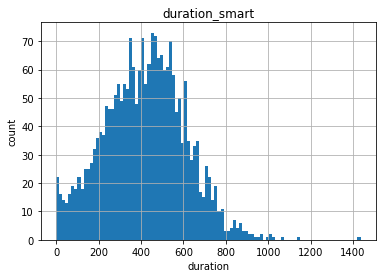

In [18]:
tariff_smart = data2.query('tariff == "smart"')
tariff_smart['duration'].hist(bins=100)
plt.title('duration_smart')
plt.xlabel('duration')
plt.ylabel('count')
plt.show()

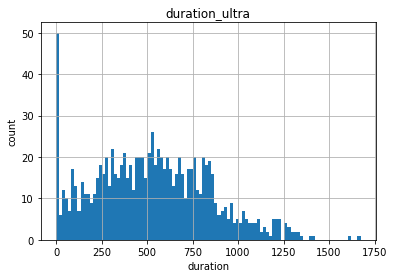

In [19]:
#analiz = data2.pivot_table(index=['tariff'], values='duration',aggfunc='sum')
tariff_ultra = data2.query('tariff == "ultra"')                          
tariff_ultra['duration'].hist(bins=100)
plt.title('duration_ultra')
plt.xlabel('duration')
plt.ylabel('count')
plt.show()
#data2.sort_values('duration').plot(x='duration',y='', kind='scatter', grid=True)                           

### Оба графика распределены нормально. На тарифе ультра большое количество 0, что означает,что тарифом пользуются ради интернета
### Пользователям тарифа ультра всегда хватает включенных минут, а вот на тарифе смарт многим не хватает пакетных минут и они переплачивают

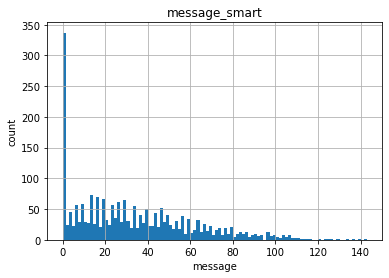

In [20]:
tariff_smart['message_count'].hist(bins=100)
plt.title('message_smart')
plt.xlabel('message')
plt.ylabel('count')
plt.show()


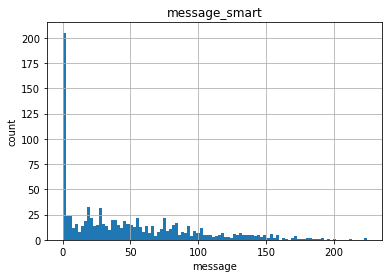

In [21]:
tariff_ultra['message_count'].hist(bins=100)
plt.title('message_smart')
plt.xlabel('message')
plt.ylabel('count')
plt.show()

### Ситуация аналогична звонкам,разве что СМС безразличны многим пользователям обоих тарифов 

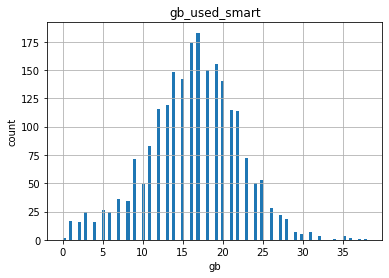

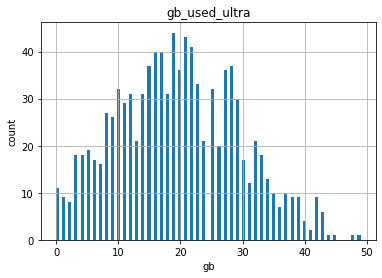

In [22]:
tariff_smart['gb_used'].hist(bins=100)
plt.title('gb_used_smart')
plt.xlabel('gb')
plt.ylabel('count')
plt.show()
tariff_ultra['gb_used'].hist(bins=100)
plt.title('gb_used_ultra')
plt.xlabel('gb')
plt.ylabel('count')
plt.show()

### За интернет переплачивают пользователи обоих тарифов, На смарте интернета не хватает больше половины пользователям

In [23]:
print(tariff_smart['duration'].mean())
print(tariff_ultra['duration'].mean())

417.9349484073576
526.6233502538071


In [24]:
print(tariff_smart['message_count'].mean())
print(tariff_ultra['message_count'].mean())

33.384028712427096
49.36345177664975


In [25]:
print(tariff_smart['gb_used'].mean())
print(tariff_ultra['gb_used'].mean())

16.328847016599372
19.494416243654822


In [26]:
print(tariff_smart['plata'].mean())
print(tariff_ultra['plata'].mean())

1289.9735307312696
2070.1522842639592


In [27]:
var_smart_duration = np.var(tariff_smart['duration'])
print(var_smart_duration)
var_ultra_duration = np.var(tariff_ultra['duration'])
print(var_ultra_duration)
std_smart_duration = np.sqrt(var_smart_duration)
print(std_smart_duration)
std_ultra_duration = np.sqrt(var_ultra_duration)
print(std_ultra_duration)

36203.06665209465
100771.22361720211
190.27103471651864
317.444835549741


In [28]:
var_smart_message = np.var(tariff_smart['message_count'])
print(var_smart_message)
var_ultra_message = np.var(tariff_ultra['message_count'])
print(var_ultra_message)
std_smart_message = np.sqrt(var_smart_message)
print(std_smart_message)
std_ultra_message = np.sqrt(var_ultra_message)
print(std_ultra_message)

796.455482917076
2282.94607539489
28.221542886898938
47.78018496610169


In [29]:
var_smart_gb = np.var(tariff_smart['gb_used'])
print(var_smart_gb)
var_ultra_gb = np.var(tariff_ultra['gb_used'])
print(var_ultra_gb)
std_smart_gb = np.sqrt(var_smart_gb)
print(std_smart_gb)
std_ultra_gb = np.sqrt(var_ultra_gb)
print(std_ultra_gb)

33.01388745483741
96.99311602978705
5.7457712671874965
9.8485083149575


## Проверка гипотез:

### Нулевая гипотеза: средняя выручка пользователей тарифов «Ультра» и «Смарт» равны
### альтернативная: средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются

In [30]:

alpha = 0.05
results = st.ttest_ind(tariff_smart['plata'], tariff_ultra['plata'])
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Отвергаем нулевую гипотезу


In [31]:
def city_group(row):
    if row['city'] == 'Москва':
        return 'Москва'
    return 'Другой'
data2['city_group'] = data2.apply(city_group, axis =1)
display(data2)

,user_id,month,duration,message_count,mb_used,tariff,city,index,messages_included,mb_per_month_included,...,perebor_minut,perebor_message,perebor_mb,perebor_gb,gb_used,pereplata_minut,pereplata_message,pereplata_gb,plata,city_group
0,1000,5,159.0,22.0,2253.49,ultra,Краснодар,1,1000,30720,...,0,0,0.00,0,3.0,0,0,0,1950,Другой
1,1000,6,172.0,60.0,23233.77,ultra,Краснодар,1,1000,30720,...,0,0,0.00,0,23.0,0,0,0,1950,Другой
2,1000,7,340.0,75.0,14003.64,ultra,Краснодар,1,1000,30720,...,0,0,0.00,0,14.0,0,0,0,1950,Другой
3,1000,8,408.0,81.0,14055.93,ultra,Краснодар,1,1000,30720,...,0,0,0.00,0,14.0,0,0,0,1950,Другой
4,1000,9,466.0,57.0,14568.91,ultra,Краснодар,1,1000,30720,...,0,0,0.00,0,15.0,0,0,0,1950,Другой
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1489,8,0.0,17.0,11050.56,smart,Санкт-Петербург,0,50,15360,...,0,0,0.00,0,11.0,0,0,0,550,Другой
3210,1489,9,0.0,32.0,17206.30,smart,Санкт-Петербург,0,50,15360,...,0,0,1846.30,2,17.0,0,0,400,950,Другой
3211,1489,10,0.0,21.0,19559.44,smart,Санкт-Петербург,0,50,15360,...,0,0,4199.44,5,20.0,0,0,1000,1550,Другой
3212,1489,11,0.0,20.0,17491.56,smart,Санкт-Петербург,0,50,15360,...,0,0,2131.56,3,18.0,0,0,600,1150,Другой


In [32]:
goroda = data2.pivot_table(index=['city_group'], values ='plata', aggfunc='mean')
print(goroda)

                  plata
city_group             
Другой      1524.936227
Москва      1546.713584


In [33]:
moskva = data2.query('city_group == "Москва"')
drygoi = data2.query('city_group == "Другой"')

### Нулевая гипотеза: средняя выручка пользователей из Москвы НЕ отличается от выручки пользователей из других регионов.
### Альтернативная: средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

In [34]:
alpha = 0.05
results = st.ttest_ind(moskva['plata'], drygoi['plata'])
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Не получилось отвергнуть нулевую гипотезу


### Вывод с большой долей вероятности средния выручка от пользователей с тарифами Смарт и Ультра различается, а вот разницы между москвой и остальными городами - нет

## Общий вывод:
Компания Мегалайн предоставила хорошую выборку данных для анализа. Пропуски и аномальные значения практически отсутствуют. Данные распределены нормально и соответсвенно выглядят правдоподобно. Мной  была рассчитана сумма,которую каждый пользователь тратит в месяц и для удобства сравнения итоговая таблица была разделена на 2 в зависимости от тарифа. Статистический анализ показал, что с большой долей вероятности во всём наборе данных средний пользователь тарифа Ультра,тратит больше денег,чем средний пользователь тарифа Смарт. Таким образом я рекомендую Мегалайну вложить дополнительные средства в продвижение тарифа Ультра